In [20]:
!pip install obspy

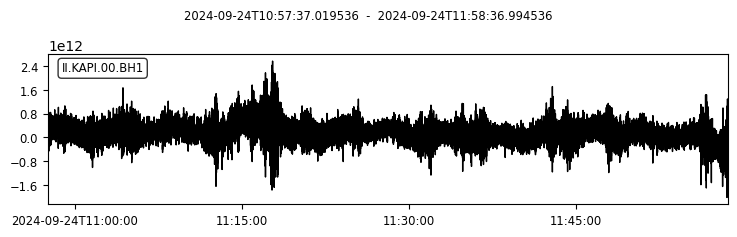

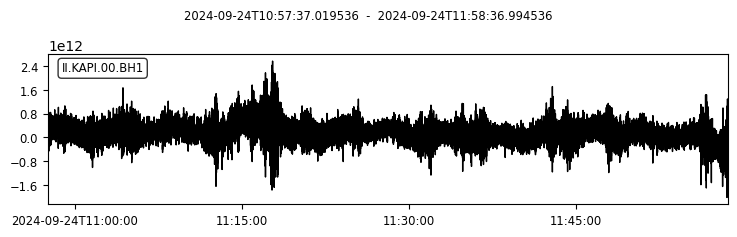

In [3]:
from obspy import read

#Load the seismic waveform file
st = read("..\Data_Source\II.KAPI.00.BH1.M.2024.268.105737.SAC")
st.plot()

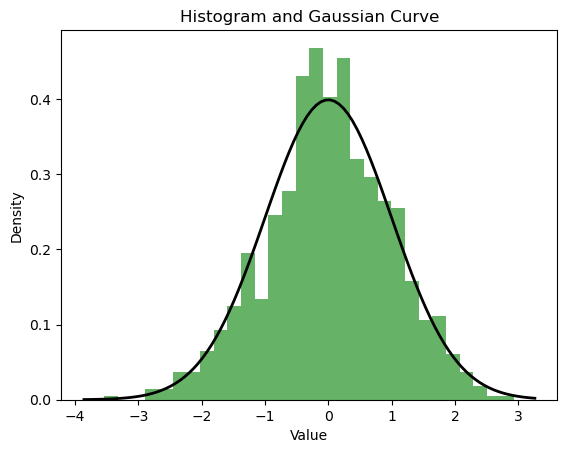

In [9]:
import numpy as np
import matplotlib.pyplot as plt

trace=st[0]
data = trace.data

# Generate random data from a Gaussian distribution
mean = 0  # Mean of the distribution
std_dev = 1  # Standard deviation of the distribution
data = np.random.normal(mean, std_dev, 1000)

# Create a histogram of the data
plt.hist(data, bins=30, density=True, alpha=0.6, color='g')

# Plot the Gaussian distribution curve
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = np.exp(-((x - mean)**2) / (2 * std_dev**2)) / (np.sqrt(2 * np.pi) * std_dev)
plt.plot(x, p, 'k', linewidth=2)

# Add titles and labels
plt.title("Histogram and Gaussian Curve")
plt.xlabel("Value")
plt.ylabel("Density")

# Show the plot
plt.show()


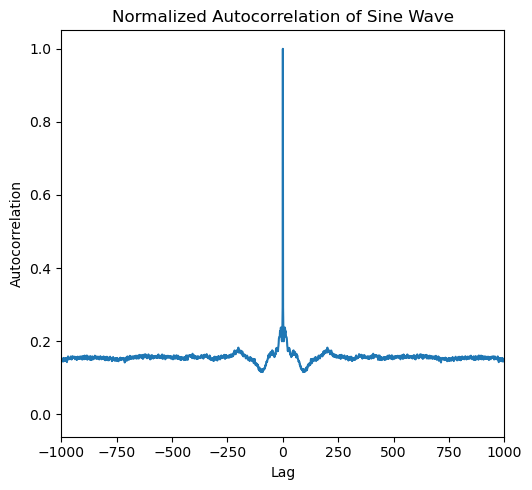

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Generate a sine wave
trace=st[0]
t = trace.data
frequency = 5 
sine_wave = np.sin(2 * np.pi * frequency * t)

# Step 2: Calculate the autocorrelation
autocorr = np.correlate(sine_wave, sine_wave, mode='full')
lags = np.arange(-len(sine_wave) + 1, len(sine_wave))  # Create lag values from -1000 to 1000

# Step 3: Normalize the autocorrelation
autocorr_normalized = autocorr / autocorr[len(sine_wave) - 1]  # Normalization by the value at lag 0

# Step 4: Plot the original sine wave and its normalized autocorrelation
plt.figure(figsize=(10, 5))

# Plot normalized autocorrelation with lags starting from -1000
plt.subplot(1, 2, 2)
plt.plot(lags, autocorr_normalized)
plt.title('Normalized Autocorrelation of Sine Wave')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.xlim([-1000, 1000])  # Set x-axis limit to show lags from -1000 to 1000

plt.tight_layout()
plt.show()